# Fit a quadratic function in 2D

Here, we are going to sample a quadratic function of this type
$$
y = a\cdot x_1^2 + b\cdot x_2^2 + c\cdot x_1\cdot x_2 + d\cdot x_1 + e\cdot x_2 + f
$$
where $a$, $b$, $c$, $d$, $e$ and $f$ are parameters and ($x_1$, $x_2$) are the two features.

NOTE: this example skips the explanation of common steps. Refer to `examples/linear_1D` and `examples/quadratic_1D` for detailed comments on each step. Have a look at `simple_sample.yaml`, `simple_train.yaml`, `planck_sample.yaml` and `planck_train.yaml` as well for additional information about the parameters to use and the possible choices.

### Load libraries and initialise relevant classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from emu_like.sample import Sample
from emu_like.ffnn_emu import FFNNEmu

2024-02-01 14:36:25.585599: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 14:36:25.587769: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 14:36:25.613158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 14:36:25.613189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 14:36:25.614004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
sample = Sample()
emu = FFNNEmu()

### Generate the sample

In [3]:
params = {
  'x1': {
      'prior': {
          'min': -80.,
          'max': 80.,
      },
  },
  'x2': {
      'prior': {
          'min': -80.,
          'max': 80.,
      },
  },
  'a': 1.,
  'b': 2.,
  'c': 1.,
  'd': -18.,
  'e': -37.,
  'f': 196.,
}

In [4]:
sample.generate(
    params,
    sampled_function='quadratic_2d',
    n_samples=100,
    spacing='grid',
    save_incrementally=False,
    output_path=None,
    verbose=True)

[info] Generating sample.
----> Sampled function: quadratic_2d
----> Number of samples: 100
----> Spacing: grid
[info] Initializing Grid sampler.


100%|██████████| 99/99 [00:00<00:00, 393588.72it/s]


In [5]:
sample.train_test_split(
    frac_train=0.9,
    seed=1567,
    verbose=True)

[info] Splitting training and testing samples.
----> Fractional number of training samples: 0.9
----> Random seed for train/test split: 1567


In [6]:
sample.rescale(
    rescale_x = 'MinMaxScaler',
    rescale_y = 'MinMaxScaler',
    verbose=True)

[info] Rescaling x and y.
----> x with: MinMaxScaler
----> y with: MinMaxScaler
----> Rescaled bounds:
--------> x_train_0 = [0.0, 1.0]
--------> x_train_1 = [0.0, 1.0]
--------> x_test_0 = [0.0, 0.888888888888889]
--------> x_test_1 = [0.0, 1.0]
--------> y_train_0 = [0.0, 1.0]
--------> y_test_0 = [0.10959083469721768, 0.7634697217675941]


### Build and train the emulator

In [7]:
params = {
    'activation': 'relu',
    'neurons_hidden': [50, 50],
    'batch_normalization': False,
    'dropout_rate': 0.,
    'batch_size': 32,
    'optimizer': 'adam',
    'loss': 'mean_relative_error',
    'want_output_layer': True,
    'sample_n_x': sample.n_x,
    'sample_n_y': sample.n_y,
}

In [8]:
emu.build(
    params,
    verbose=True)

[info] Building FFNN architecture
----> Activation function: relu
----> Dropout rate: 0.0
----> Optimizer: adam
----> Loss function: mean_relative_error
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 50)                  150       
                                                                 
 dense_1 (Dense)             (32, 50)                  2550      
                                                                 
 dense_2 (Dense)             (32, 1)                   51        
                                                                 
Total params: 2751 (10.75 KB)
Trainable params: 2751 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1441 - val_loss: 0.1358
Epoch 2/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.1176 - val_loss: 0.1216
Epoch 3/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.1158 - val_loss: 0.1167
Epoch 4/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.1121 - val_loss: 0.1148
Epoch 5/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.1075 - val_loss: 0.1139
Epoch 6/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.1037 - val_loss: 0.1181
Epoch 7/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.1032 - val_loss: 0.1192
Epoch 8/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.1014 - val_loss: 0.1130
Epoch 9/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.0986 - val_loss: 0.1066
Epoch 10/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.0979 - val_loss: 0.1037
Epoch 11/2000
3/3 

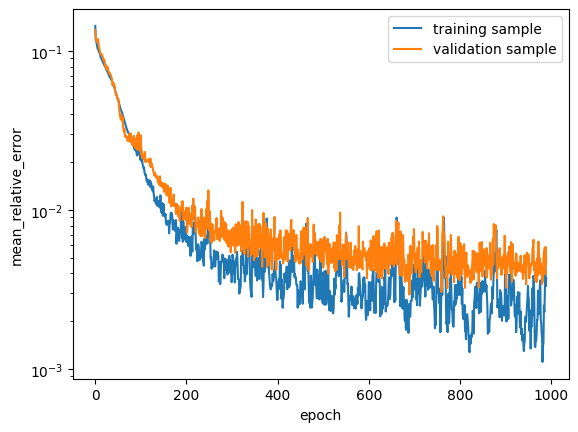

In [9]:
emu.train(
    sample,
    epochs=2000,
    learning_rate=1.e-3,
    path=None,
    get_plot=True,
    verbose=True)

Epoch 991/2990
3/3 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 992/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 993/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 994/2990
3/3 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 995/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 996/2990
3/3 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 997/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 998/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 999/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 1000/2990
3/3 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.004

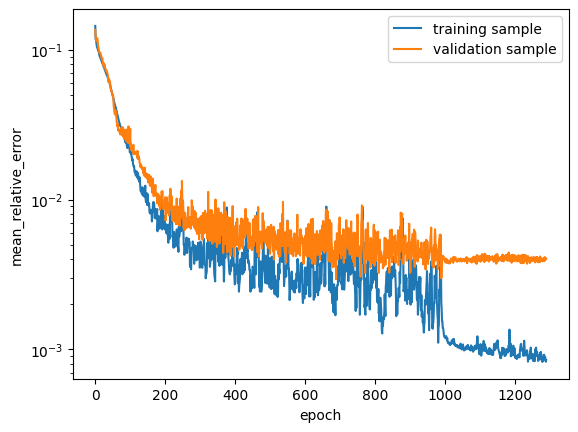

In [10]:
emu.train(
    sample,
    epochs=2000,
    learning_rate=1.e-4,
    path=None,
    get_plot=True,
    verbose=True)

### Testing the result

In [11]:
y_emu = np.array([emu.eval(x) for x in sample.x])

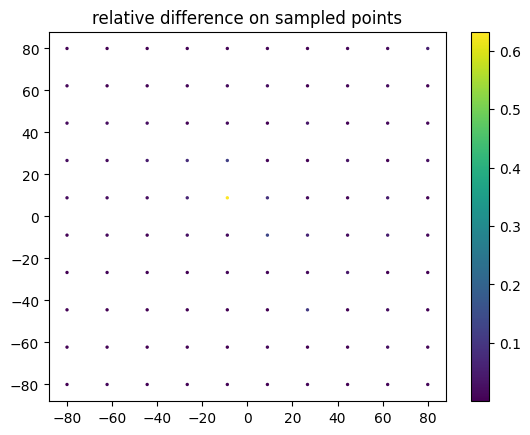

In [14]:
plt.scatter(sample.x[:, 0], sample.x[:, 1], c=np.abs(sample.y[:,0]/y_emu[:,0]-1.), s=2)
plt.title('relative difference on sampled points')
plt.colorbar()

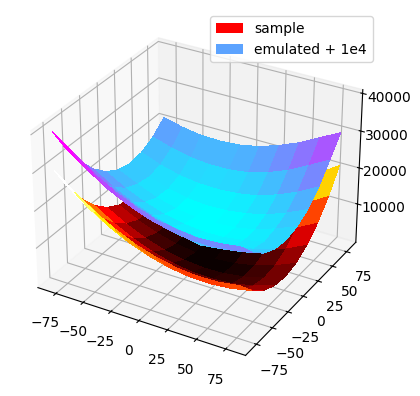

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
size = int(np.sqrt(sample.x[:, 0].shape[0]))
X = np.reshape(sample.x[:, 0], (size, size))
Y = np.reshape(sample.x[:, 1], (size, size))
Z_sample = np.reshape(sample.y[:, 0], (size, size))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_sample, cmap=cm.hot,
                       linewidth=0, antialiased=False,
                       label='sample')


# Make data.
Z_emu = np.reshape(y_emu[:, 0], (size, size))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_emu+1.e4, cmap=cm.cool,
                       linewidth=0, antialiased=False,
                       label='emulated + 1e4')

plt.legend()
plt.show()
